<a href="https://colab.research.google.com/github/aclarke500/QDAA-tutorials/blob/main/lectures/1QDAA_Tutorial_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Importing Libraries</h1>
<p>The first thing we want to do is import our libraries. Libraries are additional pieces of code (code someone else wrote that we are recycling) that can provide a lot of utility that doesn't come with Python out of the box. For pur data

In [ ]:
import pandas as pd

<h1>Importing Data</h1>
<p>Today we will be using a shopping trends dataset.<p>
<p>The dataset can be viewed on <a href="https://docs.google.com/spreadsheets/d/1cWEVkF8CnkpjdsDRCMSt5e0JkW-SmPjJdb100_wnSGs/edit?usp=sharing">Google Sheets</a>,
<a href="https://github.com/aclarke500/QDAA-tutorials/blob/main/datasets/montreal-airbnb-listings.csv">Github</a>,and downloaded on by clicking <a href="http://data.insideairbnb.com/canada/qc/montreal/2023-10-08/visualisations/listings.csv">here</a> (was sourced <a href="http://insideairbnb.com/get-the-data/">here</a>).<br>
<p>It is always useful to look at the data you are going to be analyzing before running any code with it, so I would encourage you to visually expect this. </p>
<p>
 There are many different ways to import data into Python. In the following code, we import it from Github. If you try and do this, make sure you click the "raw" button on the csv file to get the correct link.</p>

In [ ]:
url = "https://raw.githubusercontent.com/aclarke500/QDAA-tutorials/main/datasets/montreal-airbnb-listings.csv"
df = pd.read_csv(url)

<h1>Analysing Columns
<p>When analyzing a data set, it's important to see what variables we are working with.
<p>Further, in pandas, dataframes are indexed using strings, similair to Python dictionaries.
<p>Let's print out all the variables so we know both <i>what</i> we are working with and <i>how</i> to index them.

In [ ]:
for variable_name in df.columns:
  print(variable_name)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
license


<h1>Plotting!</h1>
<p>Now that we know what our variables are and how we can index them, lets plot a histogram and see what we can draw from that.
<p>In order to plot the histogram we're going to use a library called matplot. Matplot is a fantastic tool that makes plotting decent looking graphs very easy.
<p>For starters, we're gonna be plotting a histogram to see how our data is distributed.

In [ ]:
# firstly, import matplot
import matplotlib.pyplot as plt

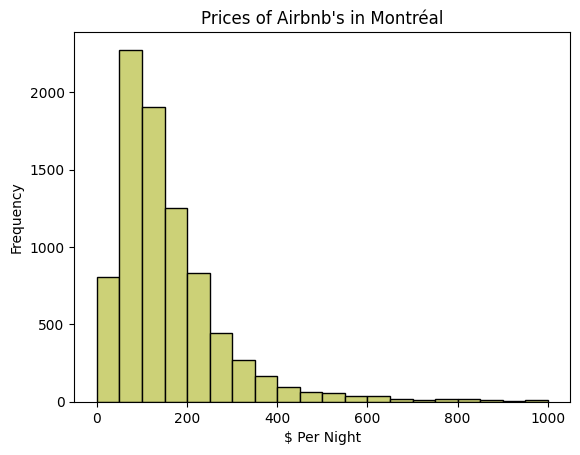

In [ ]:
plt.hist(df["price"].tolist(), bins=20, range=(0, 1000),color='#ccd177', edgecolor='black')

# Add titles and labels to make graph look dope af on da gram
plt.title("Prices of Airbnb's in Montréal")
plt.xlabel('$ Per Night')
plt.ylabel('Frequency')

# Plot that thing
plt.show()

<h1>Subsetting and Logical Arrays
<p>Often times when working with data, you don't want to look at every piece of data. For instance, you might want to <b>remove outliers</b> or only examine data that match particular <b>properties of interest</b>.
<p>Say, for instance, we are writing an article on budget friendly airbnb's in Montreal. We don't want to examine every single entry, just the cheaper ones.
<p> The way we solve this problem is with a <b>logical array</b>.
<p> Logical arrays are ordered arrays of True and False values that represent which positions are valid and invalid. For instance, if I had a list of things [present, apples, bananas, dogs, oranges], a logical array representing which of those are fruit would be [False, True, True, False, True]. This is useful for telling pandas (or any data analysis tool) which elements we want to consider.

<h2>Implementation!</h2>
Now, we're gonna only grab the places that are less than 150 per night, and create a new dataframe with our cheaper options.

In [ ]:
# create list to represent our logical array
indices_of_cheap_airbnb = df['price'] <= 150

In [ ]:
# hold our "cheap" airbnbs in a new dataframe
cheap_df = df[indices_of_cheap_airbnb]
cheap_df.head() # you can just call variables and they print

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4,38118,Rental unit in Montreal · ★4.50 · 3 bedrooms ·...,163569,M.,NaN,Ville-Marie,45.526990,-73.558400,Private room,50,31,17,2022-08-29,0.12,1,327,0,NaN
5,46626,Rental unit in Montréal · ★4.62 · 4 bedrooms ·...,208453,Maureen,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.470228,-73.607123,Private room,76,3,54,2023-09-16,0.36,2,353,14,"305995, expires: 2024-07-31"
6,50479,Rental unit in Montreal · ★4.95 · 1 bedroom · ...,231694,Noemie,NaN,Rosemont-La Petite-Patrie,45.541570,-73.607370,Entire home/apt,121,4,243,2023-09-23,1.53,2,0,52,"271530, expires: 2024-04-30"
8,66276,Rental unit in Montreal · ★4.70 · 1 bedroom · ...,324569,Anna,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.461330,-73.628967,Entire home/apt,55,32,39,2023-06-06,0.25,2,256,1,NaN
9,70489,Condo in Montreal · ★4.0 · 1 bedroom · 2 beds ...,145990,Marc Andre,NaN,Ville-Marie,45.501900,-73.563540,Entire home/apt,90,31,3,2014-09-08,0.02,1,291,0,NaN


<h2>Examine</h2>
<p>Now lets see <b>where</b> these hotels are!

In [ ]:
cheap_latitude = cheap_df['latitude'].tolist()
cheap_longitude = cheap_df['longitude'].tolist()

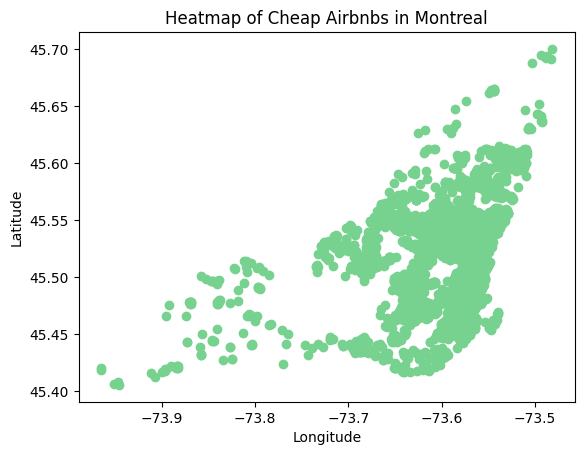

In [ ]:
plt.scatter(cheap_longitude, cheap_latitude, c='#77d18f')

plt.title("Heatmap of Cheap Airbnbs in Montreal")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

<h1>Challenge!</h1>
<p>I'm going to Montreal with my favourite QDAA members (including you if you help me out here) after exam season is over. <p>I want a decently priced, but not too cheap, airbnb between $100-200 (inclusive).
<p>However, since we have to head back for the holidays, we can only stay for a few days, so the minimum number of nights must be less than or equal to 2. Give me the list of hotels in this price range.

In [ ]:
# create logical array
not_cheap = df['price'] >= 100
# subset data
not_cheap_df = df[not_cheap]
# create new array from new data frame
not_expensive_not_cheap = not_cheap_df['price'] <= 200
# subset array from not_cheap_df
valid_price_df = not_cheap_df[not_expensive_not_cheap]
# create new df
correct_nights = valid_price_df['minimum_nights'] <= 2
valid_df = valid_price_df[correct_nights]

<h1>Bonus challenge!</h1>
<ul>
<li>Must be less than 0.1 units on the longitude latitude board from my favourite poutine place, <i>Poutineville Bishop</i> located at 45.495880, -73.575490.
<ul>


In [ ]:
poutine_spot=(45.495880, -73.575490) # location of poutinery

<h2>Solution</h2>
<p>In order to solve this problem, it's best to think of these locations as vectors. Each point on the map is a vector.</p>
<p>With this intuition as points being vectors, we can come up with our <b>objective function</b>. That is, the point, or task, we are trying to minimize. In this case, that is the distance between Poutine Bishop and a airbnb. We can determine the distance between two vectors (or points) using the formula $d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$
<p>We can determine if the point is close enough if that length is less than or equal to a certain threshold, $Θ$.

In [ ]:
def is_close_enough(lat, lon, theta):
  length = ((lat-poutine_spot[0])**2+(lon-poutine_spot[1])**2)**(1/2)
  return length <= theta

<h3>Logical Arrays</h3>
<p>It's almost like the content above was relevant! In order to determine which indices are valid, we are going to build up a logical array by iterating over the dataframe and appending the result of our close_enough funciton. From there, we can use that logical array to subset our dataframe.

In [ ]:
logical_array = []
theta = 0.01
for lat, lon in zip(valid_df['latitude'].tolist(), valid_df['longitude'].tolist()):
  logical_array.append(is_close_enough(lat, lon, theta))

ideal_airbnbs = valid_df[logical_array]


<h2>Plot Solution</h2>

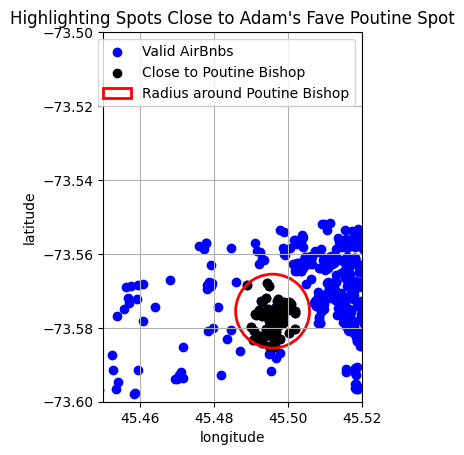

In [ ]:
import matplotlib.pyplot as plt

# create figure and axis
fig, ax = plt.subplots()

# create circle
circle = plt.Circle(poutine_spot, theta, fill=False, color='red', linewidth=2, label='Radius around Poutine Bishop')

# scatter points
ax.scatter(valid_df['latitude'].tolist(), valid_df['longitude'].tolist(), c='b', label='Valid AirBnbs')
ax.scatter(ideal_airbnbs['latitude'].tolist(), ideal_airbnbs['longitude'].tolist(), c='black', label='Close to Poutine Bishop')
# plot circle
ax.add_artist(circle)

# Add labels and legend
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title("Highlighting Spots Close to Adam's Fave Poutine Spot")
ax.legend()


ax.set_xlim([45.45, 45.52])  # Set X-axis limits
ax.set_ylim([-73.6, -73.5])  # Set Y-axis limits
ax.set_aspect('equal')  # Ensure the aspect ratio is equal

# Display the plot with grid
plt.grid(True)
plt.show()
